In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename({'Annual Income (k$)': 'Income',
          'Spending Score (1-100)':'Spend_Score'}, axis=1,inplace=True)

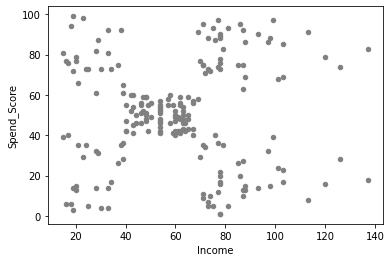

In [4]:
df.plot.scatter(x='Income', y='Spend_Score', color='gray')
plt.show()

### Scaling the attributes

In [5]:
mall_scaled = df.copy()
cols_to_scale = ['Age', 'Income', 'Spend_Score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

In [6]:
mall_scaled[cols_to_scale].describe()

,Age,Income,Spend_Score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


## Choosing the Number of Clusters

**1) Choosing the Number of Clusters Based on Visual Inspection**

Choosing the number of clusters based on visual inspection is often appealing 
because it is a decision based on looking at what is happening with the data most 
directly. People are usually quite good at looking at how much different clusters 
overlap and deciding whether a given number of clusters leads to too much overlap. 
This is not a quantitative method; however, as it leaves a lot to subjectivity and 
individual judgment, for many simple problems, it is a great way to decide how many 
clusters to use.

**2) The Elbow Method with Sum of Squared Errors (inertia)**

Often, it is difficult to tell by visualization alone how many clusters should be used 
to solve a particular problem. Different people may disagree about the number 
of clusters to use, and there may not be a clear, unanimous answer. With higher 
dimensional data, there is an additional issue: dimensionality-reduction techniques 
are not perfect. They attempt to take all the information in multiple dimensions 
and reduce it to only two. In some cases, this can work well, but as the number of 
dimensions increases, the data becomes more complex, and these visual methods 
quickly reach their limitations. When this happens, it's not easy to determine through 
visual inspection what the right number of clusters to use is. In these cases, it's often 
better to reach for a more quantitative measure. One such classic measure is to look 
for an elbow in a plot of the sum of squared errors, also called an Inertia Plot.

The sum of squared errors (SSE) is the sum of the "errors" (the difference between 
a data point and the centroid of its assigned cluster) for all data points, squared. 
Another term for it is inertia. The tighter the clusters, the closer the constituent points 
to their respective clusters, and the lower the SSE/inertia. The sum of squared errors 
for the model can be calculated using the following equation:
Figure 4.5: Equation for calculating the sum of squared errors 
of data points in a dataset
Here, μk
 is the location of the centroid of cluster k, and each xi
 is a data point assigned 
to cluster k. When all the entities are treated as a single cluster, this SSE value is at 
its maximum for the dataset. As we increase k, we should expect the sum of squared 
errors to decrease since there are more centroids. In the extreme case, when each 
point is a cluster, the SSE/inertia value is 0, as each point is the centroid for its own 
cluster. In scikit-learn, you will use the 'inertia_' attribute that is available after 
fitting a model.

### Choosing the Number of Clusters Based on Visual Inspection

In [7]:
from sklearn.cluster import KMeans
cluster_cols = ['Income', 'Spend_Score']
markers = ['x', '*', '.', '|', '_', '1', '2']

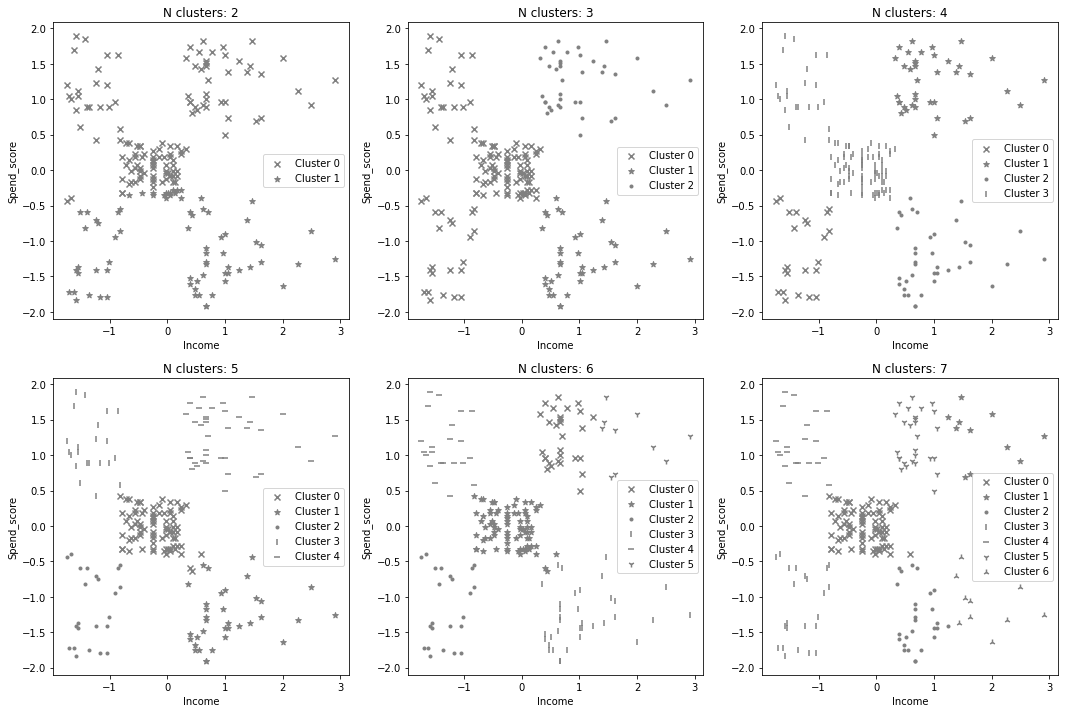

In [8]:
plt.figure(figsize=[18,12])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict(mall_scaled[cluster_cols])
    

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_Score, \
                marker=markers[clust], \
                label="Cluster "+str(clust), color='gray')
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()

plt.show()

### The Elbow Method with Sum of Squared Errors (inertia)

In [9]:
K = 3
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [10]:
print(model.inertia_)

print("You will see that inertia is 157.70. Note that this number by itself does not mean much to us. We are more interested in how this number changes with the number of clusters")

157.70400815035939
You will see that inertia is 157.70. Note that this number by itself does not mean much to us. We are more interested in how this number changes with the number of clusters


In [11]:
X = mall_scaled[cluster_cols]
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

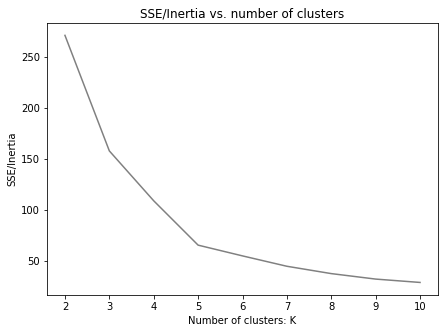

By observing the preceding plot, you will notice that there is an elbow in the plot at K=5. So, we take five as the optimal number of clusters, the best value of K for the KMeans algorithm. Before that, every additional cluster gives us big gains in reducing the sum of squared errors. Beyond five, we seem to be getting extremely low returns.


In [12]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()


print("By observing the preceding plot, you will notice that there is an elbow in the plot at K=5. So, we take five as the optimal number of clusters, the best value of K for the KMeans algorithm. Before that, every additional cluster gives us big gains in reducing the sum of squared errors. Beyond five, we seem to be getting extremely low returns.")

## More CLustering Techniques

**Mean-shift clustering** is an interesting algorithm in contrast to the k-means 
algorithm because unlike k-means, it does not require you to specify the number of 
clusters. The intuition of its working is rather simple – it works by starting at each 
data point and shifting the data points (assigning them to clusters) toward the area 
of greatest density – that is, towards a natural cluster centroid. When all the data 
points have found their local density peak, the algorithm is complete. This tends to 
be computationally expensive, so this method does not scale well to large datasets 
(k-means clustering, on the other hand, scales very well).

While not needing to choose the number of clusters sounds great, there is another 
hyper-parameter that strongly influences the behavior of the algorithm - bandwidth. 
Also referred to as window size, bandwidth defines how far each data point will look 
when searching for a higher density area. As you can expect, a higher bandwidth 
would allow points to look farther and get linked to farther away clusters and can 
lead to fewer, looser, larger clusters. 

A common method (which we will use shortly) for determining the best bandwidth 
is to estimate it based on the distances between nearby points (using a quantile 
parameter which specifies the proportion of data points to look across), but this 
method requires you to choose a quantile that determines the proportion of points to 
look at. This is non-trivial. In practice, this ends up being a very similar problem to the 
problem of choosing a number of clusters where at some point you, the user, have to 
choose what hyperparameter to use.









In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth=0.9

In [14]:
ms=MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])

mall_scaled['Cluster1'] = ms.predict(X)

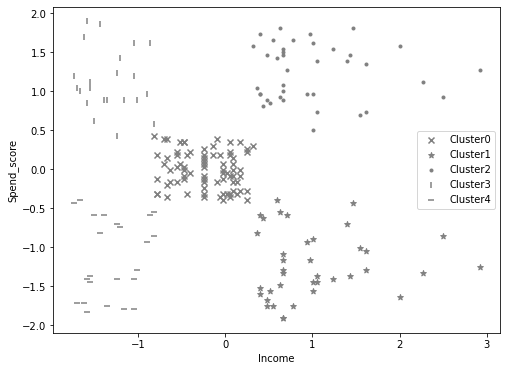

The model has found five unique clusters. They are very much aligned with the clusters you arrived at earlier using K-means where you specified 5 clusters. But notice that the clusters on the right have areas of very low density. The choice of bandwidth has led to such loose clusters. 


In [15]:
markers = ['x', '*', '.', '|', '_', '1', '2']
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster1.nunique()):
    temp = mall_scaled[mall_scaled.Cluster1 == clust]
    plt.scatter(temp.Income, temp.Spend_Score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color='gray')

plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()


print("The model has found five unique clusters. They are very much aligned with the clusters you arrived at earlier using K-means where you specified 5 clusters. But notice that the clusters on the right have areas of very low density. The choice of bandwidth has led to such loose clusters. ")

In [16]:
print("""Estimate the required bandwidth using the estimate_bandwidth method. 
Use the estimate_bandwidth function with a quantile value of 0.1 (an 
arbitrary choice) to estimate the best bandwidth to use.""") 

bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], \
                               quantile=0.1)
print(bandwidth)

Estimate the required bandwidth using the estimate_bandwidth method. 
Use the estimate_bandwidth function with a quantile value of 0.1 (an 
arbitrary choice) to estimate the best bandwidth to use.
0.6487582521320147


In [17]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique()

7

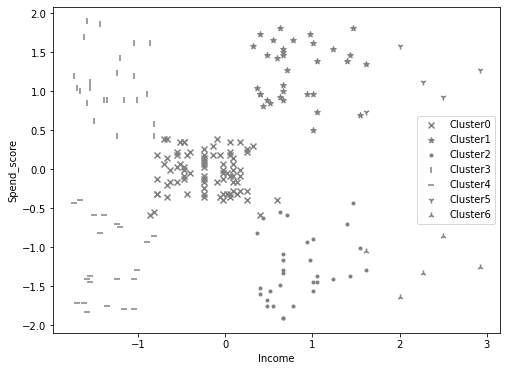

In [18]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_Score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

In [19]:
## Changint eh quantile to 0.15

bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], \
                               quantile=0.15)
print(bandwidth)

0.8582301835333547


In [20]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique()

5

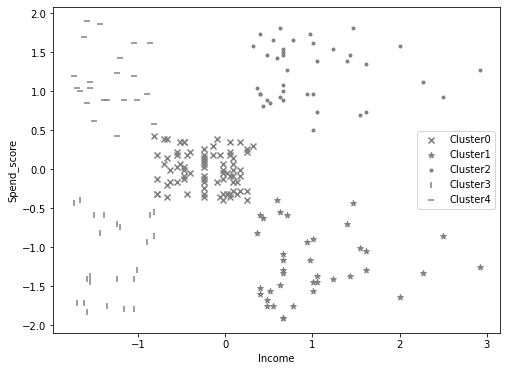

In this exercise, you successfully used mean-shift clustering with varying parameters 
to make your understanding more concrete. When you used a quantile value of 
0.15, which means you looked at more points to estimate the bandwidth required, 
you ended up with a bandwidth of about 0.86 and obtained 5 clusters. When you 
used a quantile value of 0.1, though, the estimated bandwidth was about 0.65 and 
obtained 7 clusters. This demonstrates the impact of the bandwidth parameter, 
alternatively, the quantile parameter used to estimate the bandwidth.


In [21]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_Score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

print("""In this exercise, you successfully used mean-shift clustering with varying parameters 
to make your understanding more concrete. When you used a quantile value of 
0.15, which means you looked at more points to estimate the bandwidth required, 
you ended up with a bandwidth of about 0.86 and obtained 5 clusters. When you 
used a quantile value of 0.1, though, the estimated bandwidth was about 0.65 and 
obtained 7 clusters. This demonstrates the impact of the bandwidth parameter, 
alternatively, the quantile parameter used to estimate the bandwidth.""")

## Benefits and Drawbacks of the Mean-Shift Technique 

In the previous exercise, we saw that the mean-shift algorithm too had its own key 
hyper-parameters. This is again a choice to be made by the user. Why, then, bother 
with mean-shift clustering? To answer this let us understand the benefits and 
drawbacks of the mean-shift algorithm. 
Benefits of mean-shift algorithm
1. We don't need to pre-specify the number of clusters.

2. The single parameter, bandwidth, has a physical meaning and its effects are easy to interpret.

3. It can identify complex-shaped clusters (k-means only gave spherical/globular clusters).

4. Robust to outliers.

Drawbacks of mean-shift algorithm

1. Computationally expensive, doesn't scale well to large datasets.

2. Does not work well with a high number of dimensions (leads to unstable clusters).

3. No direct control over the number of clusters, which is problematic when we have business constraints on the number of clusters.

We can see that the **mean-shift** algorithm is another powerful, density-based 
approach to clustering. While it has its own hyper-parameter and some issues with 
scalability, it does have its merits which can be extremely useful in certain situations. 
But both approaches we saw so far work only for quantitative data. In practice, we 
come across many situations that need us to work with non-numeric data. Let us 
now explore another technique for clustering, that helps us handle different types of 
data better.


## k-modes and k-prototypes Clustering


k-means clustering is great when you are dealing exclusively with quantitative data. 
However, when you have categorical data (that is, data that can't be converted into 
numerical order, such as race, language, and country) with more than two categories, 
the representation of this data using numbers becomes a key consideration. In 
statistics, one common strategy for dealing with categorical data is to use dummy 
variables—the practice of creating a new **indicator** variable for each category - so 
that each of these dummy variables is a binary. When clustering, this can lead to 
complications, because if you have many different categories, you are adding many 
different dimensions for each categorical variable and the result will often not 
properly reflect the kinds of groupings you're looking for.


To handle such situations, two related methods make dealing with categorical data 
more natural. **k-modes** is a clustering algorithm that uses the mode of a cluster rather 
than the mean, but otherwise performs just like the k-means algorithm. Like mean is 
a good measure for the typical/ central value for a continuous variable, 'mode' or the 
most commonly occurring category is the typical value for a categorical variable. The 
K-modes algorithm is a great choice for categorical data.

**k-prototypes** clustering allows you to deal with cases where there is a mix of 
categorical and continuous variables. Instead of defining a centroid for each cluster 
like k-means or k-modes, k-prototypes clustering chooses a data point to be the 
prototype and uses that as if it is the centroid of the cluster, updating to a new data 
point closer to the center of all data points assigned to that cluster using the same 
process as k-means or k-modes



In [22]:
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-2.csv")



print("""An important feature for business is the education level of the customer and needs to 
be included in the segmentation. The values in the data are Primary, Secondary, 
and Tertiary. Since this is a categorical feature, K-means is not a suitable 
approach. You need to create customer segmentation with this data by applying 
k-prototype clustering to data that has a mix of categorical (education) and 
continuous (income) variables""")

An important feature for business is the education level of the customer and needs to 
be included in the segmentation. The values in the data are Primary, Secondary, 
and Tertiary. Since this is a categorical feature, K-means is not a suitable 
approach. You need to create customer segmentation with this data by applying 
k-prototype clustering to data that has a mix of categorical (education) and 
continuous (income) variables


In [23]:
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_scaled = bank0.copy()
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

In [25]:
from kmodes.kprototypes import KPrototypes
cluster_cols = ['Income', 'Education']

kp = KPrototypes(n_clusters=3, random_state=42)

bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols],categorical=[1])

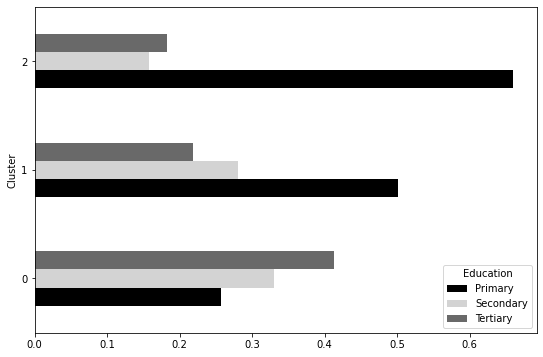

cluster 2 is dominated by customers with 
primary education. In cluster 1, the number of primary educated customers 
roughly equals the number of secondary and tertiary educated customers 
together. In cluster 0, customers with higher education (secondary or 
tertiary) significantly outnumber those with primary education.


In [26]:
res = bank_scaled.groupby('Cluster')['Education'].value_counts(normalize=True)

res.unstack().plot.barh(figsize=[9,6],color=['black','lightgray','dimgray'])
plt.show()


print("""cluster 2 is dominated by customers with 
primary education. In cluster 1, the number of primary educated customers 
roughly equals the number of secondary and tertiary educated customers 
together. In cluster 0, customers with higher education (secondary or 
tertiary) significantly outnumber those with primary education.""")

you have successfully used k-prototypes clustering to segment 
people based on their Income and Education levels. A visual analysis gave insight into 
the nature of the clusters. Visual analysis is good but brings a lot of subjectivity and 
isn't always a good idea when dealing with high-dimensional data. It is always good to 
have quantitative measures for evaluating clusters. 

## Evaluating Clustering


We have seen various ways of performing clustering so far, each approach having 
its merits. For the same task, we saw that the approaches provided varying results. 
Which of them is better? Before we answer that, we need to be able to evaluate how 
good the results from clustering are. Only then can we compare across segmentation 
approaches. We need to have, therefore, ways to evaluate the quality of clustering. 

Another motivation for cluster evaluation methods is the reiteration that clustering is 
a part of a bigger segmentation exercise, of which clustering is a key part, but far from 
the whole. Recall from the discussion in the previous chapter that in segmentation 
exercises, business is often the end consumer of the segments and acts on them. The 
segments, therefore, need to make sense to the business as well and be actionable. 
That is why we need to be able to evaluate clusters from a business perspective as 
well. We have discussed this aspect in the previous chapter and stated the involved 
considerations. Let us further the discussion on the technical evaluation of clusters.

A principled, objective way of evaluating clusters is essential. Subjective methods, 
such as visual inspection, can always be used, but we acknowledge that they have 
serious limitations. Quantitative methods for cluster evaluation remove subjectivity 
and have the added advantage of enabling some level of automation. One such 
measure is the silhouette score - a powerful objective method that can be used 
with data that is more difficult to visualize. 



Note that the silhouette score is a general measure of how well a clustering fits 
the data, so it can be used to not only compare two different models of different 
types but also choose hyperparameters, such as the number of clusters or choice of 
quantile for calculating bandwidth for mean-shift clustering



## Silhouette Score

A natural way to evaluate clusters is as follows: if the clusters are well-separated, then 
any point in a cluster should be closer to most of the points in the same cluster than 
to a point from another cluster.

This intuition is quantified through the silhouette score. The silhouette score is a 
formal measure of how well a clustering fits the data. The higher the score, the 
better the clusters are. The score is calculated for each data point separately, 
and the average is taken as a measure of how well the model fits the whole 
dataset altogether. 

Let us understand the score better. There are two main components to the score. 
The first component measures how well the data point fits into the cluster that 
it is assigned to. This is defined as the average distance between it and all other 
members of that same cluster. The second component measures how well the data 
point fits into the next nearest cluster. It is calculated in the same way by measuring 
the average distance between the data point and all the data points assigned to the 
next nearest cluster. The difference between these two numbers can be taken as a 
measure of how well the data point fits into the cluster it is assigned to as opposed 
to a different cluster. Therefore, when calculated for all data points, it's a measure of 
how well each data point fits into the particular cluster it's been assigned to. 
More formally, given data point xi, where axi is the average distance between that 
data point and all other data points in the same cluster and bxi is the average distance 
between data point xi and the data points in the next nearest cluster

Note that since we divide by the maximum of axi and bxi, we end up with a number 
between −1 and 1. A negative score means that this data point is actually on average 
closer to the other cluster, whereas a high positive score means it's a much better 
fit to the cluster it is assigned to. A value close to 0 would mean that the sample is 
close to both clusters. When we take the average score across all data points, we will 
therefore still get a number between −1 and 1, where the closer we are to one the 
better the fit.


In [27]:
cluster_cols = ['Income', 'Spend_Score']
X = mall_scaled[cluster_cols]
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

In [28]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


In [29]:
silhouette_scores = []
for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

In [30]:
silhouette_scores

[0.3146990432802128,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5398800926790663,
 0.5263454490712252,
 0.45584381231187066,
 0.45532159949822104,
 0.4476280825932578]

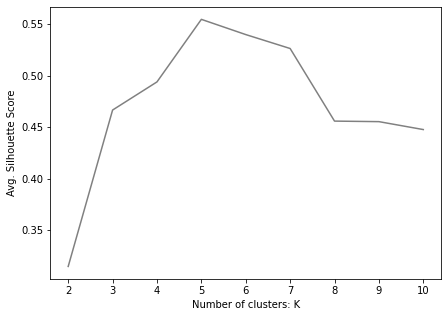

you can infer that K=5 has the best silhouette score and is therefore the optimal number of clusters.


In [31]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

print("""you can infer that K=5 has the best silhouette score and is therefore the optimal number of clusters.""")


## Test_Train_Split

In [32]:
from sklearn.model_selection import train_test_split

df_train, df_test=train_test_split(df, train_size=0.75, random_state=42)

In [33]:
print(df_train.shape)
print(df_test.shape)

(150, 5)
(50, 5)


In [34]:
model = KMeans(n_clusters=6, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.5436475209961419


C:\Users\Rushi\AppData\Local\Temp/ipykernel_2344/2170284986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])


In [35]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols], df_test['Cluster'])
print(silhouette_avg)

0.49569011684195546


C:\Users\Rushi\AppData\Local\Temp/ipykernel_2344/1252342871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Cluster'] = model.predict(df_test[cluster_cols])


#### The silhouette score is 0.495, which is a big drop from 0.545 on the train set. To understand the cause for this drop, you'll need to visualize the clusters on the test data

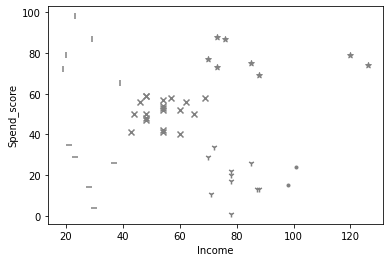

In [36]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_Score, \
                marker=markers[clust], \
                color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

What do you gather from the plot? First, the top right cluster doesn't seem to be 
a good one. There are two points that are far from the dense part of the cluster. 
This is not a tight cluster. Second, the bottom right cluster contains just two 
points, both of which are very close to another cluster. This cluster should be 
merged with the adjacent cluster.